In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [95]:
data_2d = pd.read_csv('data/data_2d.csv', header=None)
mnist_data = pd.read_csv('data/mnist.csv', header=None)

In [96]:
data_2d.sample(5)

,0,1,2
114,1.0,2.585031,2.498500
65,0.0,0.168753,0.467312
174,1.0,0.805504,0.887481
17,0.0,1.543772,1.750231
66,0.0,2.695722,1.425587


In [97]:
mnist_data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
430,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
data_2d.columns = ['X1', 'X2', 'X3']
data_2d.head(2)

,X1,X2,X3
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961


### Проведемо кластеризацію, використовуючи алгоритм і застосуємо ліктевий метод для визначення оптимальної кількості кластерів для двовимірного датасету.

In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_2d_scaled = scaler.fit_transform(data_2d[['X2', 'X3']])

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2d_scaled)
    inertia.append(kmeans.inertia_)

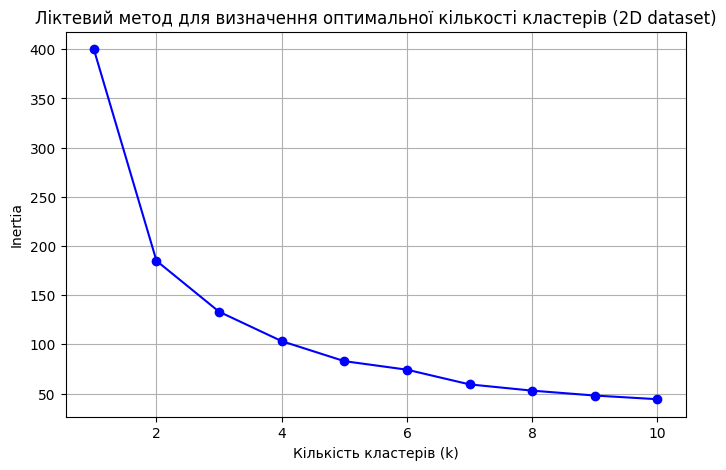

In [100]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Inertia')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів (2D dataset)')
plt.grid(True)
plt.show()

- Ліктевий метод для двовимірного датасету показує, що оптимальна кількість кластерів знаходиться в точці, де графік починає вирівнюватися. Я оберу 3 кластери для цього датасету.

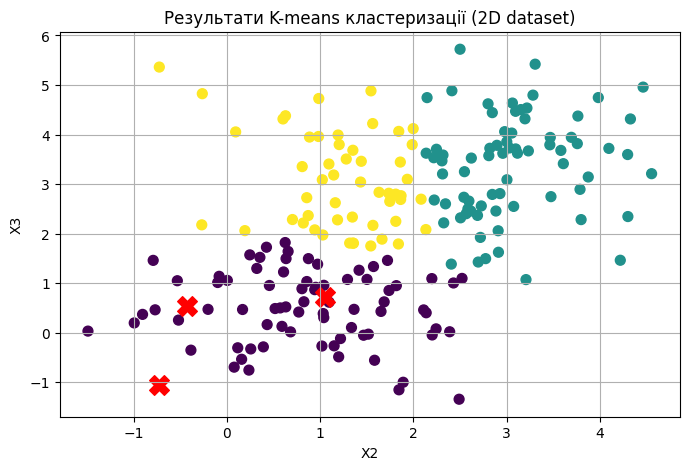

In [101]:
kmeans_2d = KMeans(n_clusters=3, random_state=42)
data_2d['Cluster'] = kmeans_2d.fit_predict(data_2d_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(data_2d['X2'], data_2d['X3'], c=data_2d['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('X2')
plt.ylabel('X3')
plt.title('Результати K-means кластеризації (2D dataset)')
plt.grid(True)
plt.show()

### Метод головних компонент - PCA

In [102]:
from sklearn.preprocessing import MinMaxScaler

mnist_data_scaled = mnist_data

scaler_min_max = MinMaxScaler()
mnist_data_scaled = scaler.fit_transform(mnist_data[1:])

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(mnist_data_scaled)

In [104]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [105]:
principal_df

,Principal Component 1,Principal Component 2
0,4.961571,-12.443693
1,-6.930812,-5.874765
2,8.580078,-0.359429
3,1.127062,6.574874
4,-7.587865,-5.585081
...,...,...
494,8.561231,-1.859072
495,-3.372754,7.391119
496,-6.224062,0.273322
497,0.393462,-0.374245


Візуалізація результатів PCA:

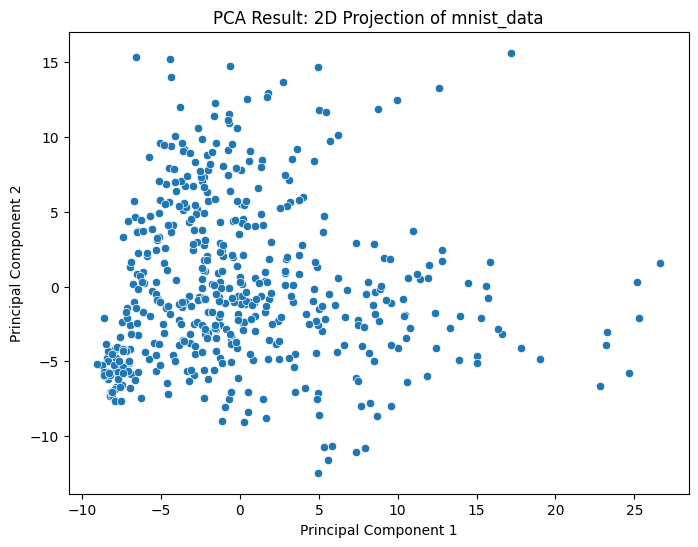

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='Principal Component 1', y='Principal Component 2')
plt.title('PCA Result: 2D Projection of mnist_data')
plt.show()